In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import scipy
import math
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("nifty-data.csv") 
df.head()

,Date,Close
0,02-Mar-20,11132.75
1,03-Mar-20,11303.30
2,04-Mar-20,11251.00
3,05-Mar-20,11269.00
4,06-Mar-20,10989.45


In [4]:
df.shape

(250, 2)

In [5]:
df.dtypes

Date      object
Close    float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

There are approximately 252 trading days in an year with an average of 21 days per month, or 63 days per quarter. Out of a possible 365 days, 104 days are weekends (Saturday and Sunday) when the stock exchanges are closed.

In [8]:
# Set Date column as index of the dataframe
df.index = df['Date']

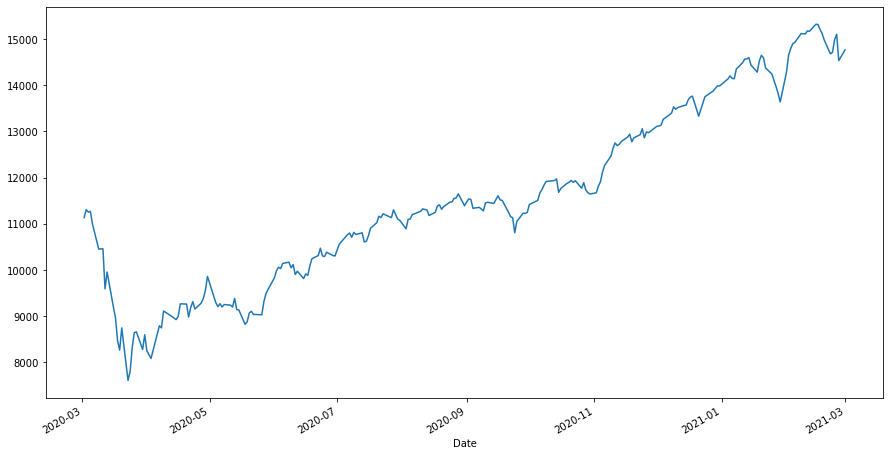

In [9]:
df['Close'].plot(figsize = (15,8))
plt.show()

In [10]:
# Daily Returns
df['Daily Returns'] = df['Close'].pct_change()*100
df.head()

,Date,Close,Daily Returns
Date,,,
2020-03-02,2020-03-02,11132.75,NaN
2020-03-03,2020-03-03,11303.30,1.531966
2020-03-04,2020-03-04,11251.00,-0.462697
2020-03-05,2020-03-05,11269.00,0.159986
2020-03-06,2020-03-06,10989.45,-2.480699


In [11]:
df.dropna(axis = 0, inplace = True)

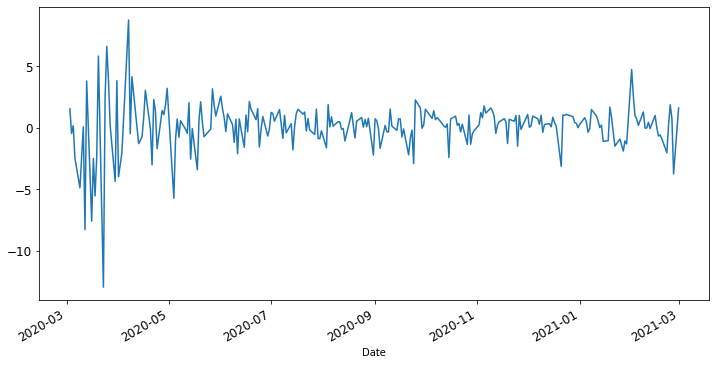

In [12]:
df['Daily Returns'].plot(figsize = (12, 6), fontsize = 12)

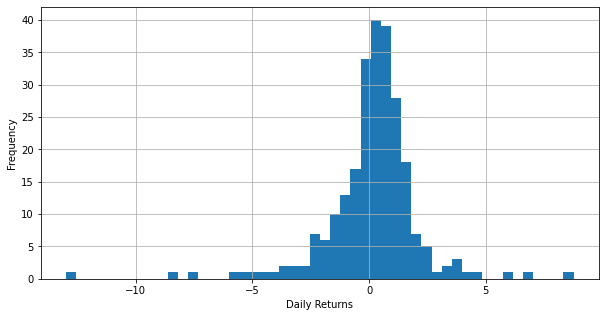

count    249.000000
mean       0.133833
std        2.007339
min      -12.980464
25%       -0.457678
50%        0.278532
75%        0.998463
max        8.763205
Name: Daily Returns, dtype: float64

In [13]:
# Plotting daily returns distribution histogram
df['Daily Returns'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()
df['Daily Returns'].describe()

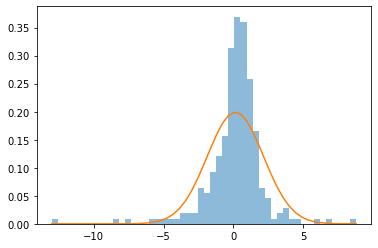

In [14]:
_, bins, _ = plt.hist(df['Daily Returns'], 50, density=1, alpha=0.5)
mu, sigma = scipy.stats.norm.fit(df['Daily Returns'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

In [15]:
#  Daily Volatility/ Std Deviation Calculation
df['Daily Returns'].std()

2.007338831096268

In [16]:
# Annual Volatility
(df['Daily Returns'].std())*math.sqrt(252)

31.865516064742884